# PL10 - QSMVs con PennyLane

In [1]:
!pip install pennylane

import pennylane as qml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.1 MB/s eta 0:00:00


## Creación del conjunto de datos

Utilizaremos las herramientas de *SciKit Learn* para crear un conjunto de datos con el que trabajar

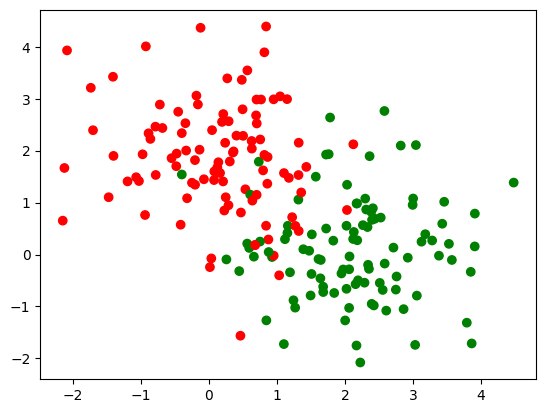

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

seed = 1234

X, y = make_blobs(n_samples=200, centers = [[0,2],[2,0]], random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=seed)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=matplotlib.colors.ListedColormap(["red","green"]));

Vamos a usar *angle embedding*, así que escalamos los datos al intervalo $[0,\pi]$.

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## QUANTUM SUPPORT VECTOR MACHINES

Vamos a definir un *kernel* cuántico que calcularemos usando PennyLane

In [4]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding(x2, wires=range(n_qubits)))
    return qml.probs()

def kernel_matrix(A, B):
    return np.array([[kernel(a, b)[0] for b in B] for a in A])

Ahora, usamos *SVC* de *SciKit Learn* para entrenar un SVM con el kernel que hemos construido

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)
predictions = svm.predict(X_test)
accuracy_score(predictions, y_test)

0.9

# EJERCICIO

Crear un dataset de cuatro variables. Clasificarlo usando *QSVM*

In [6]:
X, y = make_blobs(n_samples=200, centers = [[0,1.5,1.5,0],[1.5,0,1.5,0]], random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=seed)


In [7]:
scaler = MinMaxScaler(feature_range=(0,np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def kernel(x1, x2):
    qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.templates.AngleEmbedding(x2, wires=range(n_qubits)))
    return qml.probs()

def kernel_matrix(A, B):
    return np.array([[kernel(a, b)[0] for b in B] for a in A])

In [9]:
svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)
predictions = svm.predict(X_test)
accuracy_score(predictions, y_test)

0.825